# **Convert Zip file to CSV**

In [1]:
# Extract Zip
import zipfile

with zipfile.ZipFile("Resumes.zip", 'r') as zip_ref:
    zip_ref.extractall("resumes")

In [2]:
# Verify the folder structure
base_path="resumes"

In [3]:
# Load Data from extracted folder
import os

base_path = "resumes"

for root, dirs, files in os.walk(base_path):
    ...

In [4]:
pip install python-docx PyMuPDF textract pandas tqdm

Requested textract from https://files.pythonhosted.org/packages/6b/3e/ac16b6bf28edf78296aea7d0cb416b49ed30282ac8c711662541015ee6f3/textract-1.6.5-py3-none-any.whl has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    extract-msg (<=0.29.*)
                 ~~~~~~~^
Please use pip<24.1 if you need to use this version.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
# Define the label rules
def get_label(file_path, file_name):
    path_lower = file_path.lower()
    name_lower = file_name.lower()

    if "peoplesoft" in path_lower:
        return "Peoplesoft"
    elif "sql developer" in path_lower or "lightening" in path_lower:
        return "SQL Developer"
    elif "workday" in path_lower:
        return "Workday"
    elif "react" in name_lower:
        return "React Developer"
    elif "intern" in name_lower:
        return "Internship"
    else:
        return "Unknown"

In [6]:
# Extract Text from files
!pip install PyMuPDF
!pip install 'pip<24.1' # Downgrade pip
!pip install textract
!pip install python-docx

import fitz
import textract
from docx import Document

def extract_text(file_path):
    ext = file_path.split('.')[-1].lower()
    try:
        if ext == 'pdf':
            doc = fitz.open(file_path)
            return " ".join([page.get_text() for page in doc])
        elif ext == 'docx':
            doc = Document(file_path)
            return " ".join([p.text for p in doc.paragraphs])
        elif ext == 'doc':
            return textract.process(file_path).decode("utf-8")
        else:
            return ""
    except:
        return ""

  Using cached pymupdf-1.26.7-cp310-abi3-manylinux_2_28_x86_64.whl.metadata (3.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Using cached textract-1.6.5-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 64.6 MB/s eta 0:0

  Using cached python_docx-1.2.0-py3-none-any.whl.metadata (2.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.4 MB/s eta 0:00:00
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
# Build Dataset
import os
import pandas as pd
from tqdm import tqdm

base_path = "resumes"
data = []

for root, dirs, files in os.walk(base_path):
    for file in tqdm(files):
        if file.endswith(('.pdf', '.docx', '.doc')):
            file_path = os.path.join(root, file)
            text = extract_text(file_path)
            label = get_label(root, file)
            if len(text) > 100 and label != "Unknown":
                data.append([text, label])

df = pd.DataFrame(data, columns=["Resume", "Category"])
df['Category'].value_counts()

0it [00:00, ?it/s]
100%|██████████| 20/20 [00:00<00:00, 30.62it/s]


,count
Category,
React Developer,19
SQL Developer,11
Workday,11
Peoplesoft,10
Internship,2


In [8]:
# Save the dataset
df.to_csv("resume_dataset.csv", index=False)

In [9]:
# Install required libraries
!pip install pandas numpy scikit-learn nltk spacy matplotlib seaborn streamlit wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.2 MB/s eta 0:00:00
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# **Exploratory Data Analysis**

In [10]:
# Download resources for NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
import pandas as pd

df = pd.read_csv("/content/resume_dataset.csv")  # example name
df.head()

,Resume,Category
0,SUSOVAN BAG Seeking a challenging po...,Internship
1,Name: Ravali P ...,Internship
2,\n \n \nPage | 1 \n \nName: M. Prabakaran \n...,React Developer
3,Naveen Sadhu Title: software developer\t\t\...,React Developer
4,Pranish Sonone \t Career summary: Exper...,React Developer


In [12]:
print(df.shape)
df['Category'].value_counts()
df.isnull().sum()

(53, 2)


,0
Resume,0
Category,0


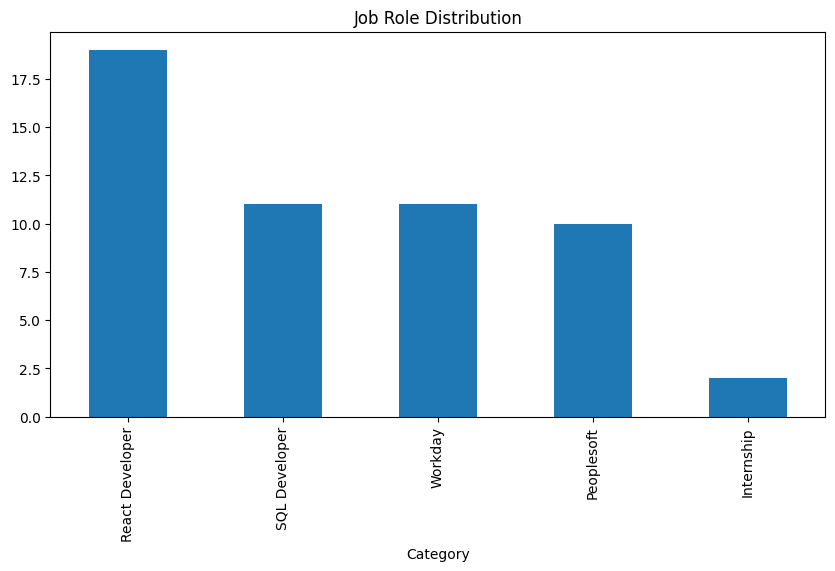

In [13]:
# Plot category distribution
import matplotlib.pyplot as plt

df['Category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Job Role Distribution")
plt.show()

In [14]:
df['Category'].value_counts()

,count
Category,
React Developer,19
SQL Developer,11
Workday,11
Peoplesoft,10
Internship,2


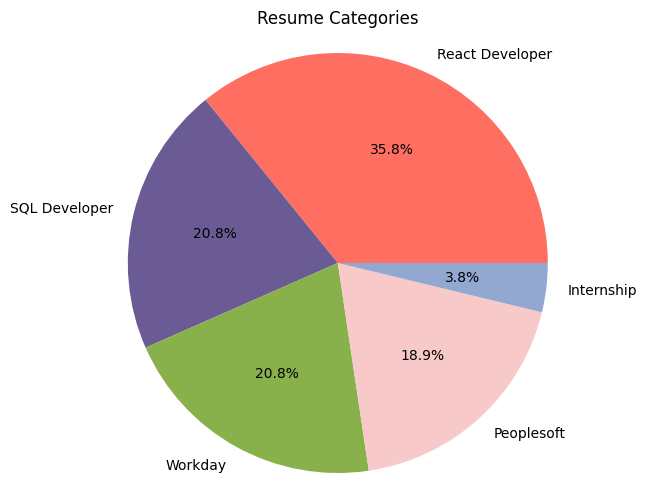

In [15]:
#Pie chart
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251']

# Count values
category_counts = df['Category'].value_counts()

# Plot pie chart with percentages
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',colors=colors)
plt.title("Resume Categories")
plt.axis('equal')
plt.show()

In [16]:
# Character length of each resume
df['resume_length'] = df['Resume'].astype(str).str.len()

# Word count of each resume
df['word_count'] = df['Resume'].astype(str).str.split().apply(len)

# Descriptive statistics
print(df['resume_length'].describe())
print(df['word_count'].describe())

count       53.000000
mean      4014.679245
std       2380.280250
min        994.000000
25%       2621.000000
50%       3633.000000
75%       5089.000000
max      15339.000000
Name: resume_length, dtype: float64
count      53.000000
mean      539.811321
std       326.819702
min       133.000000
25%       339.000000
50%       505.000000
75%       630.000000
max      2038.000000
Name: word_count, dtype: float64


In [17]:
import re

#Create a clean text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Replace newline characters with space
    text = re.sub(r'\n', ' ', text)
    # Keep only lowercase letters and spaces
    text = re.sub(r'[^a-z ]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove leading and trailing spaces
    return text.strip()

#Apply cleaning to resumes
df['clean_resume'] = df['Resume'].apply(clean_text)
all_text = " ".join(df['clean_resume'])

In [18]:
#Verify cleaning
df[['Resume', 'clean_resume']].head(2)

,Resume,clean_resume
0,SUSOVAN BAG Seeking a challenging po...,susovan bag seeking a challenging position in ...
1,Name: Ravali P ...,name ravali p curriculum vitae specialization ...


In [19]:
from collections import Counter

#Count most common words
word_freq = Counter(all_text.split())
word_freq.most_common(20)

[('and', 1364),
 ('the', 753),
 ('in', 695),
 ('to', 603),
 ('of', 497),
 ('on', 353),
 ('for', 343),
 ('experience', 313),
 ('using', 222),
 ('with', 217),
 ('as', 216),
 ('application', 183),
 ('workday', 181),
 ('from', 173),
 ('a', 172),
 ('project', 172),
 ('data', 166),
 ('server', 161),
 ('reports', 159),
 ('business', 154)]

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# filter out stopwords (very common english words that does not carry technical meaning)
filtered_words = [
    word for word in all_text.split()
    if word not in ENGLISH_STOP_WORDS and len(word) > 2
]

word_freq = Counter(filtered_words)
word_freq.most_common(20)

[('experience', 313),
 ('using', 222),
 ('application', 183),
 ('workday', 181),
 ('project', 172),
 ('data', 166),
 ('server', 161),
 ('reports', 159),
 ('business', 154),
 ('sql', 152),
 ('peoplesoft', 138),
 ('knowledge', 130),
 ('process', 117),
 ('web', 114),
 ('good', 103),
 ('skills', 100),
 ('involved', 98),
 ('working', 95),
 ('like', 94),
 ('various', 93)]

In [21]:
skill_categories = {
    "Programming Languages": [
        "python", "java", "javascript", "c", "c++", "sql"
    ],
    "Web Technologies": [
        "html", "css", "react", "angular", "node", "web"
    ],
    "Databases": [
        "mysql", "postgresql", "mongodb", "oracle", "sql"
    ],
    "ERP / Tools": [
        "workday", "peoplesoft", "sap"
    ],
    "Data & Analytics": [
        "data", "analysis", "reports", "analytics"
    ]
}

In [22]:
skill_freq = {}

for category, skills in skill_categories.items():
    count = 0
    for skill in skills:
        count += all_text.count(skill)
    skill_freq[category] = count

skill_freq

{'Programming Languages': 7046,
 'Web Technologies': 453,
 'Databases': 284,
 'ERP / Tools': 351,
 'Data & Analytics': 469}

In [23]:
df.head()

,Resume,Category,resume_length,word_count,clean_resume
0,SUSOVAN BAG Seeking a challenging po...,Internship,1667,184,susovan bag seeking a challenging position in ...
1,Name: Ravali P ...,Internship,3498,280,name ravali p curriculum vitae specialization ...
2,\n \n \nPage | 1 \n \nName: M. Prabakaran \n...,React Developer,2825,388,page name m prabakaran title ui developer prof...
3,Naveen Sadhu Title: software developer\t\t\...,React Developer,1450,193,naveen sadhu title software developer location...
4,Pranish Sonone \t Career summary: Exper...,React Developer,1548,223,pranish sonone career summary experience of ye...


In [24]:
# Top Keywords per Category
from sklearn.feature_extraction.text import CountVectorizer

def top_words(category):
    text = df[df['Category'] == category]['Resume']
    vec = CountVectorizer(stop_words='english', max_features=10)
    X = vec.fit_transform(text)
    return vec.get_feature_names_out()

for cat in df['Category'].unique():
    print(cat, ":", top_words(cat))

Internship : ['cases' 'good' 'integration' 'knowledge' 'meeting' 'organization'
 'skills' 'test' 'testing' 'using']
React Developer : ['developer' 'experience' 'javascript' 'js' 'project' 'react' 'skills'
 'used' 'using' 'web']
Workday : ['business' 'custom' 'eib' 'experience' 'integrations' 'process' 'report'
 'reports' 'using' 'workday']
SQL Developer : ['data' 'database' 'experience' 'functions' 'project' 'reports' 'server'
 'sql' 'tables' 'using']
Peoplesoft : ['application' 'domains' 'experience' 'people' 'peoplesoft' 'process'
 'scheduler' 'server' 'servers' 'web']


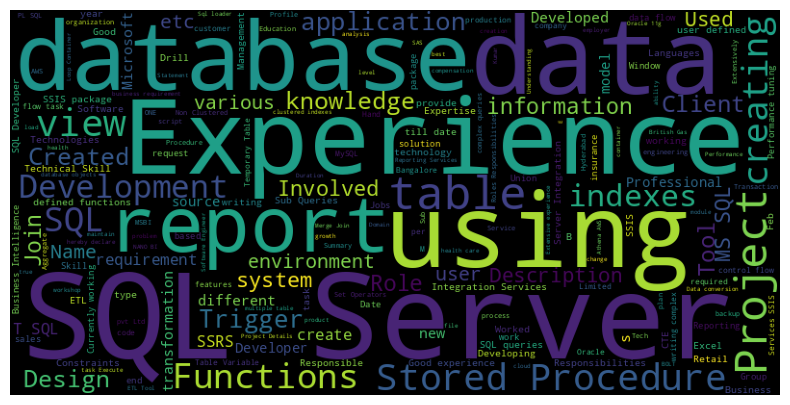

In [25]:
# Word Cloud per Role
from wordcloud import WordCloud

text = " ".join(df[df['Category'] == 'SQL Developer']['Resume'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [26]:
df.duplicated(subset='Resume').sum()

np.int64(0)

In [27]:
# Check Vocabulary Size
from sklearn.feature_extraction.text import TfidfVectorizer

temp_vec = TfidfVectorizer(stop_words='english')
temp_vec.fit(df['Resume'])

len(temp_vec.vocabulary_)

3209

In [28]:
df.head()

,Resume,Category,resume_length,word_count,clean_resume
0,SUSOVAN BAG Seeking a challenging po...,Internship,1667,184,susovan bag seeking a challenging position in ...
1,Name: Ravali P ...,Internship,3498,280,name ravali p curriculum vitae specialization ...
2,\n \n \nPage | 1 \n \nName: M. Prabakaran \n...,React Developer,2825,388,page name m prabakaran title ui developer prof...
3,Naveen Sadhu Title: software developer\t\t\...,React Developer,1450,193,naveen sadhu title software developer location...
4,Pranish Sonone \t Career summary: Exper...,React Developer,1548,223,pranish sonone career summary experience of ye...


In [29]:
# 1. Define Features & Target

X = df['clean_resume']
y = df['Category']

In [30]:
# 2. Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
# 3. Build Pipeline (TF-IDF + Classifier)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        ngram_range=(1,2),
        max_features=5000,
        min_df=2,
        max_df=0.9
    )),
    ('clf', LinearSVC(class_weight='balanced'))
])

In [32]:
# 4. Train Model

pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 ngram_range=(1, 2), stop_words='english')),
                ('clf', LinearSVC(class_weight='balanced'))])

In [33]:
# 5. Evaluate Model

from sklearn.metrics import accuracy_score, classification_report

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091
                 precision    recall  f1-score   support

     Internship       0.00      0.00      0.00         1
     Peoplesoft       1.00      1.00      1.00         2
React Developer       0.80      1.00      0.89         4
  SQL Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         2

       accuracy                           0.91        11
      macro avg       0.76      0.80      0.78        11
   weighted avg       0.84      0.91      0.87        11



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


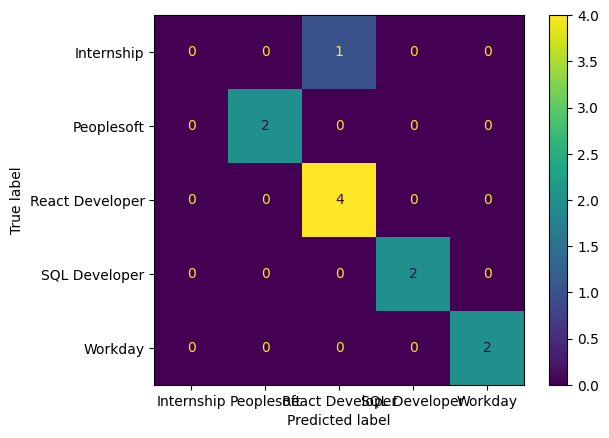

In [34]:
# 6. Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

In [35]:
# 7. Cross-Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy Mean:", cv_scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV Accuracy Mean: 0.9777777777777779


In [37]:
# 8. Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__C': [0.1, 1, 5, 10]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=1) # Changed n_jobs to 1
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Params:", grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Params: {'clf__C': 1}


In [38]:
# 9. Evaluate Best Model

best_pred = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, best_pred))
print(classification_report(y_test, best_pred))

Best Model Accuracy: 0.9090909090909091
                 precision    recall  f1-score   support

     Internship       0.00      0.00      0.00         1
     Peoplesoft       1.00      1.00      1.00         2
React Developer       0.80      1.00      0.89         4
  SQL Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         2

       accuracy                           0.91        11
      macro avg       0.76      0.80      0.78        11
   weighted avg       0.84      0.91      0.87        11



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# 10. Save Best Model

import pickle

with open("resume_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as best_resume_model.pkl")

Model saved as best_resume_model.pkl
